In [ ]:
#We want to predict victory or defeat in a football match when we are given the number of goals a team scores. To do this we consider the set of results of the football matches from the Spanish league and we build a classification model with it. We follow the steps:

#-Read this file in a pandas -DataFrame: https://www.football-data.co.uk/ 

#-Select these columns in a new DataFrame:

#-'HomeTeam','AwayTeam', 'FTHG', 'FTAG', 'FTR'. (FTHG: -Home team goals, FTAG: Away team goals, FTR: H=Home -Win, D=Draw, A=Away Win)

#-Visualize a scatter plot of FTHG versus FTAG.

#-Built a X 1-d predictor with all scores and a y binary variable indicating win or loss.

#-Compute and visualize a logistic regression.

#Which is the cut value?

Cut value (threshold goals for win prediction): 1.429190328685032


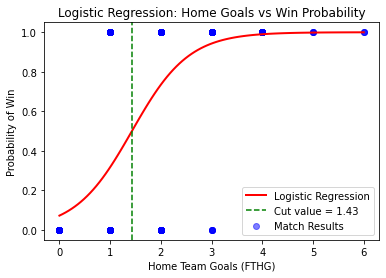

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

# Dataset
url = "https://www.football-data.co.uk/mmz4281/2223/SP1.csv"  # Example La Liga season
df = pd.read_csv(url)

# Select only required columns
df = df[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']]

# Create binary variable (1 = Home win, 0 = Not win)
df['Result'] = df['FTR'].apply(lambda x: 1 if x == 'H' else 0)

# Define predictor (X: Home Goals) and target (y: Result)
X = df[['FTHG']]
y = df['Result']

# Train Logistic regression
model = LogisticRegression()
model.fit(X, y)

# Find cut value
intercept = model.intercept_[0]
coef = model.coef_[0][0]
cut_value = -intercept / coef
print("Cut value (threshold goals for win prediction):", cut_value)

# Visualization
X_range = np.linspace(0, df['FTHG'].max(), 100).reshape(-1, 1)
y_prob = model.predict_proba(X_range)[:, 1]

plt.scatter(X, y, color="blue", alpha=0.5, label="Match Results")
plt.plot(X_range, y_prob, color="red", linewidth=2, label="Logistic Regression")
plt.axvline(cut_value, color="green", linestyle="--", 
            label=f"Cut value = {cut_value:.2f}")

plt.xlabel("Home Team Goals (FTHG)")
plt.ylabel("Probability of Win")
plt.title("Logistic Regression: Home Goals vs Win Probability")
plt.legend()
plt.show()
